In [ ]:
# iPhone Sales Analysis

## Business Objective
Analyze 2,000+ sales records to evaluate revenue, profit margins, regional performance, and product trends.

In [ ]:
## Key Business Questions
- Which model contributes most to profit?
- Which region drives highest revenue?
- How does discount rate impact margin?
- Which channel performs better?


In [ ]:
## Dataset Overview
The dataset includes order-level sales data with fields such as:
OrderID, Model, Region, Channel, UnitPrice, Quantity, GrossSales, NetSales, COGS, Profit.

In [8]:
import pandas as pd
import numpy as np
import plotly.graph_objects
import plotly.express as px

In [9]:
data=pd.read_csv("iphone_data.csv")

In [3]:
data

,OrderID,OrderDate,Model,Storage,Color,Region,City,Channel,UnitPrice,Quantity,DiscountRate,GrossSales,NetSales,COGS,Profit
0,IP10000,2023-04-13,iPhone 15 Pro Max,128GB,Black,West,Mumbai,Online,163900.0,1,0.05,163900.0,155705.0,132700.0,23005.0
1,IP10001,2024-12-01,iPhone 15 Pro Max,128GB,Silver,North,Lucknow,Store,157900.0,1,0.00,157900.0,157900.0,114200.0,43700.0
2,IP10002,2023-11-27,iPhone 13,128GB,White,South,Hyderabad,Online,66900.0,1,0.20,66900.0,53520.0,52900.0,620.0
3,IP10003,2024-10-25,iPhone 14,1TB,White,East,Bhubaneswar,Store,79800.0,1,0.00,79800.0,79800.0,67500.0,12300.0
4,IP10004,2024-05-06,iPhone 14,1TB,Blue,West,Mumbai,Online,84100.0,1,0.10,84100.0,75690.0,61200.0,14490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,IP12495,2025-01-26,iPhone 15,256GB,Silver,South,Chennai,Store,93400.0,1,0.15,93400.0,79390.0,76800.0,2590.0
2496,IP12496,2023-02-28,iPhone 14,256GB,Red,East,Kolkata,Store,82100.0,2,0.10,164200.0,147780.0,132600.0,15180.0
2497,IP12497,2023-04-05,iPhone 14 Pro,512GB,Gold,South,Hyderabad,Online,121900.0,1,0.05,121900.0,115805.0,100900.0,14905.0
2498,IP12498,2024-04-15,iPhone 15,512GB,Red,East,Kolkata,Online,89300.0,1,0.05,89300.0,84835.0,66500.0,18335.0


In [4]:
data.head(5)

,OrderID,OrderDate,Model,Storage,Color,Region,City,Channel,UnitPrice,Quantity,DiscountRate,GrossSales,NetSales,COGS,Profit
0,IP10000,2023-04-13,iPhone 15 Pro Max,128GB,Black,West,Mumbai,Online,163900.0,1,0.05,163900.0,155705.0,132700.0,23005.0
1,IP10001,2024-12-01,iPhone 15 Pro Max,128GB,Silver,North,Lucknow,Store,157900.0,1,0.00,157900.0,157900.0,114200.0,43700.0
2,IP10002,2023-11-27,iPhone 13,128GB,White,South,Hyderabad,Online,66900.0,1,0.20,66900.0,53520.0,52900.0,620.0
3,IP10003,2024-10-25,iPhone 14,1TB,White,East,Bhubaneswar,Store,79800.0,1,0.00,79800.0,79800.0,67500.0,12300.0
4,IP10004,2024-05-06,iPhone 14,1TB,Blue,West,Mumbai,Online,84100.0,1,0.10,84100.0,75690.0,61200.0,14490.0


In [5]:
data.isnull().sum()
#the data doesn't contain any missing values

OrderID         0
OrderDate       0
Model           0
Storage         0
Color           0
Region          0
City            0
Channel         0
UnitPrice       0
Quantity        0
DiscountRate    0
GrossSales      0
NetSales        0
COGS            0
Profit          0
dtype: int64

In [6]:
data.describe()

,UnitPrice,Quantity,DiscountRate,GrossSales,NetSales,COGS,Profit
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000
mean,106512.440000,1.248000,0.097660,132392.400000,119652.216000,102466.76000,17185.45600
std,32418.661988,0.431938,0.070153,61351.745182,56868.870347,47626.50057,14835.83407
min,60000.000000,1.000000,0.000000,60000.000000,48000.000000,43700.00000,-12880.00000
25%,76600.000000,1.000000,0.050000,82400.000000,74460.000000,63700.00000,7040.00000
50%,93700.000000,1.000000,0.100000,126600.000000,112550.000000,96850.00000,14525.00000
75%,134400.000000,1.000000,0.150000,152200.000000,140030.000000,119100.00000,24082.50000
max,169900.000000,2.000000,0.200000,339800.000000,339200.000000,282600.00000,97000.00000


In [7]:
#TOP MODELS
top_models= data.groupby("Model")["Quantity"].sum().sort_values(ascending=False)
top_models=top_models.reset_index()
print("Top Selling Models (by Units Sold):\n", top_models)

Top Selling Models (by Units Sold):
                Model  Quantity
0          iPhone 14       557
1          iPhone 13       542
2          iPhone 15       523
3      iPhone 15 Pro       513
4      iPhone 14 Pro       508
5  iPhone 15 Pro Max       477


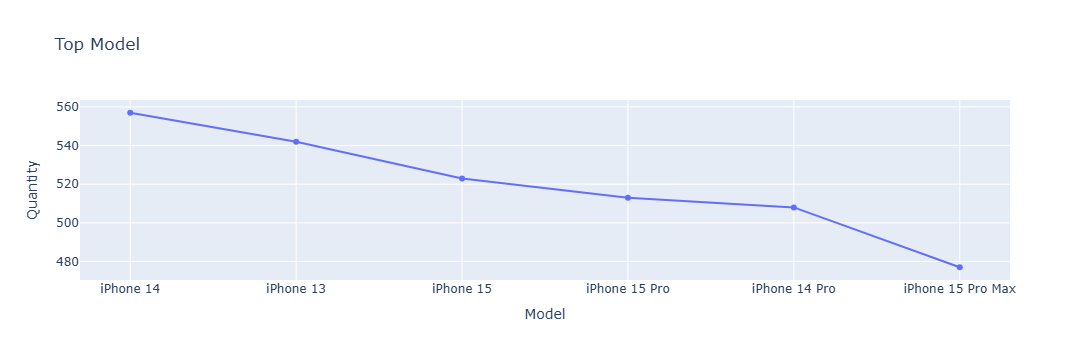

In [79]:
#GRAPPH FOR ANALYSING TOP MODEL
tgraph=px.line(top_models, x="Model", y="Quantity", title="Top Model", markers=True)
 tgraph.show()

In [5]:
# SALES TREAND OVERTIME
data["OrderDate"] = pd.to_datetime(data["OrderDate"])
monthly_sales = data.groupby(data["OrderDate"].dt.to_period("M"))["NetSales"].sum().reset_index()
print(monthly_sales)
monthly_sales["OrderDate"]=monthly_sales["OrderDate"].astype("str")

   OrderDate    NetSales
0    2023-01   8766540.0
1    2023-02   8175645.0
2    2023-03   9638510.0
3    2023-04  10503120.0
4    2023-05   9967950.0
5    2023-06   9560310.0
6    2023-07   9585970.0
7    2023-08  10760130.0
8    2023-09  10477280.0
9    2023-10   8061570.0
10   2023-11   9122550.0
11   2023-12  10023815.0
12   2024-01  10383230.0
13   2024-02   9705540.0
14   2024-03  10221425.0
15   2024-04   9763715.0
16   2024-05   9835055.0
17   2024-06  11409530.0
18   2024-07  11580640.0
19   2024-08   8870580.0
20   2024-09  10203865.0
21   2024-10  11657885.0
22   2024-11  12817485.0
23   2024-12   9475240.0
24   2025-01   8891630.0
25   2025-02   9775215.0
26   2025-03   8568875.0
27   2025-04  10520835.0
28   2025-05  11117670.0
29   2025-06   9688735.0


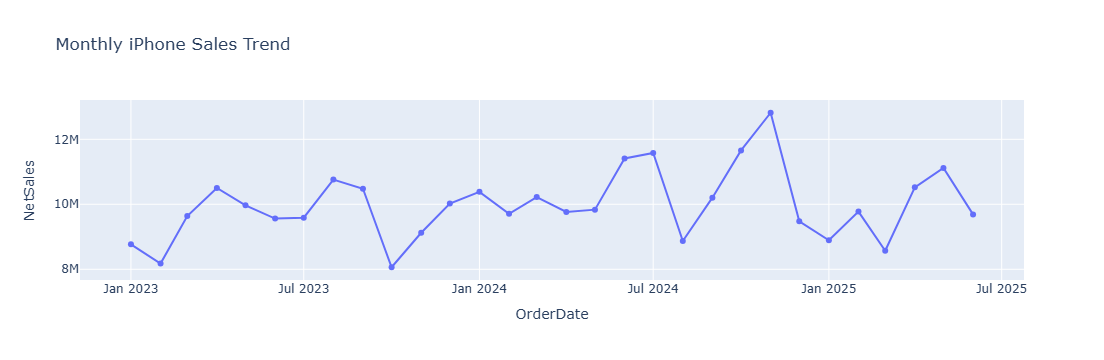

In [30]:
#GRAPH FOR THE SAME
fig = px.line(monthly_sales, x="OrderDate", y="NetSales", 
              title="Monthly iPhone Sales Trend", 
              markers=True)
# fig.update_yaxes(
#   dtick=2000000,
#   tickformat=".2s"
# )
fig.show()

In [38]:
#PROFITABLE STORAGE VARIANT
profitable_variant=data.groupby("Storage")["NetSales"].sum().sort_values(ascending=False)
profitable_variant=profitable_variant.reset_index()
print(profitable_variant)

  Storage    NetSales
0     1TB  76810835.0
1   128GB  74846430.0
2   512GB  74248215.0
3   256GB  73225060.0


In [37]:
#POPULAR STORAGE VARIANGT
popular_variant=data.groupby("Storage")["Quantity"].sum().sort_values(ascending=False)
print(popular_variant)

Storage
1TB      809
128GB    774
256GB    770
512GB    767
Name: Quantity, dtype: int64


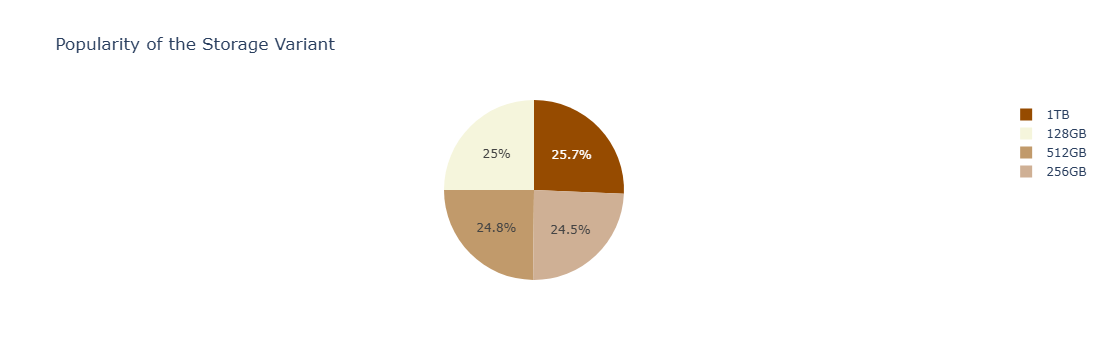

In [44]:
#GRAPH FOR THE SAME
graf = px.pie(
    profitable_variant,
    names="Storage",
    values="NetSales",
    title="Popularity of the Storage Variant",
    color_discrete_sequence=["#964B00","#F5F5DC","#C19A6B","#CFB095"]
)
graf.show()

In [35]:
#MOST POPULAR COLOR
popular_color=data.groupby("Color")["Quantity"].sum().sort_values(ascending=False)
print(popular_color)

Color
Blue      557
Red       545
White     519
Gold      503
Silver    502
Black     494
Name: Quantity, dtype: int64


In [45]:
#pROFITABLE COLOR VARIANT
profitable_color=data.groupby("Color")["NetSales"].sum().sort_values(ascending=False)
profitable_color=profitable_color.reset_index()
print(profitable_color)

    Color    NetSales
0     Red  53315815.0
1    Blue  52638560.0
2   White  50183775.0
3    Gold  49365775.0
4  Silver  47628760.0
5   Black  45997855.0


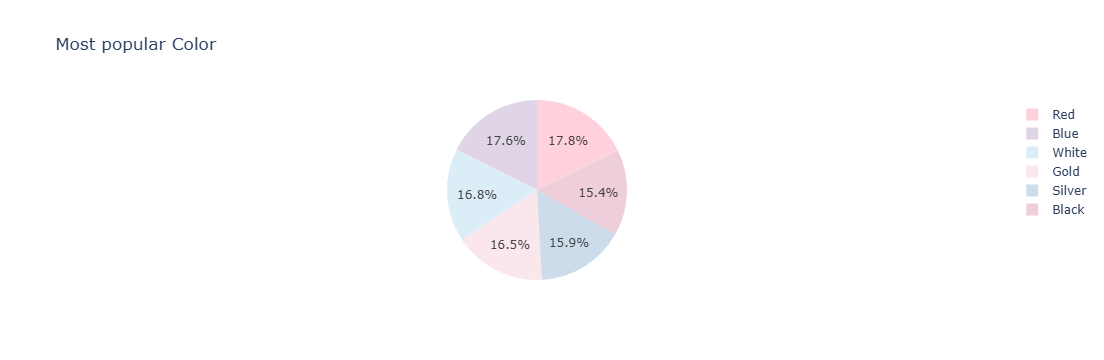

In [55]:
#GRAPH FOR THE SAME
cgraph=px.pie(
    profitable_color, 
    names="Color", 
    values="NetSales", 
    title="Most popular Color",
    color_discrete_sequence=["#FFD1DC","#E0D4E7","#DBEEF7","#FAE7EB","#CCDCEB","#EECEDA"]
)
cgraph.show()

In [39]:
#Regional Sales Analysis(By Quantity)
region_sales=data.groupby("Region")["Quantity"].sum().sort_values(ascending=False)
print(region_sales)

Region
North    794
South    791
East     781
West     754
Name: Quantity, dtype: int64


In [56]:
#Regional Sales Analysis( By Region and City)
profitable_region=data.groupby("Region")["NetSales"].sum().sort_values(ascending=False)
profitable_city=data.groupby("City")["NetSales"].sum().sort_values(ascending=False)
print(profitable_region)
print(profitable_city)
profitable_region=profitable_region.reset_index()
# .round().astype(int)

Region
East     76074290.0
South    75673780.0
North    74550250.0
West     72832220.0
Name: NetSales, dtype: float64
City
Chennai        28551750.0
Chandigarh     27531510.0
Kolkata        25830840.0
Mumbai         25736475.0
Hyderabad      25487100.0
Bhubaneswar    25405240.0
Pune           25063220.0
Patna          24838210.0
Delhi          24515270.0
Lucknow        22503470.0
Ahmedabad      22032525.0
Bengaluru      21634930.0
Name: NetSales, dtype: float64


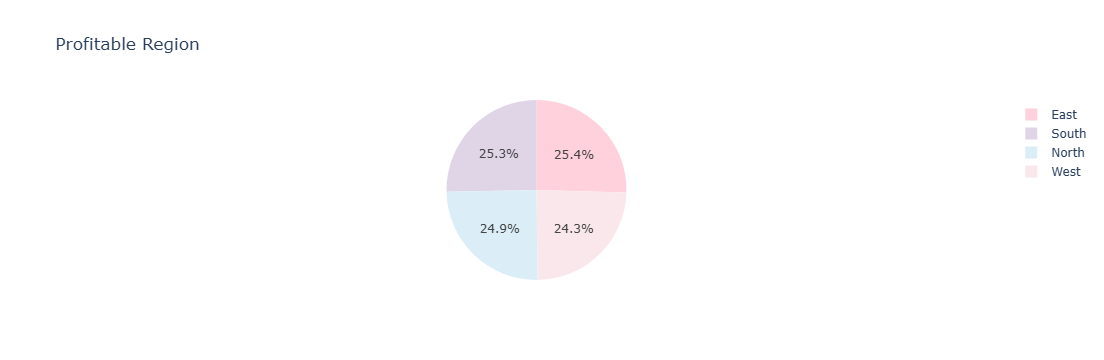

In [61]:
#GRAPH FOR THE SAME
rgraph=px.pie(
    profitable_region,
    names="Region", 
    values="NetSales", 
    title="Profitable Region",
    color_discrete_sequence=["#FFD1DC","#E0D4E7","#DBEEF7","#FAE7EB"]
)
rgraph.show()

In [62]:
#ANALYSING PREFERRED CHANNEL
channel_sales = data.groupby("Channel")["NetSales"].sum().reset_index()
print(channel_sales)

  Channel     NetSales
0  Online  150263540.0
1   Store  148867000.0


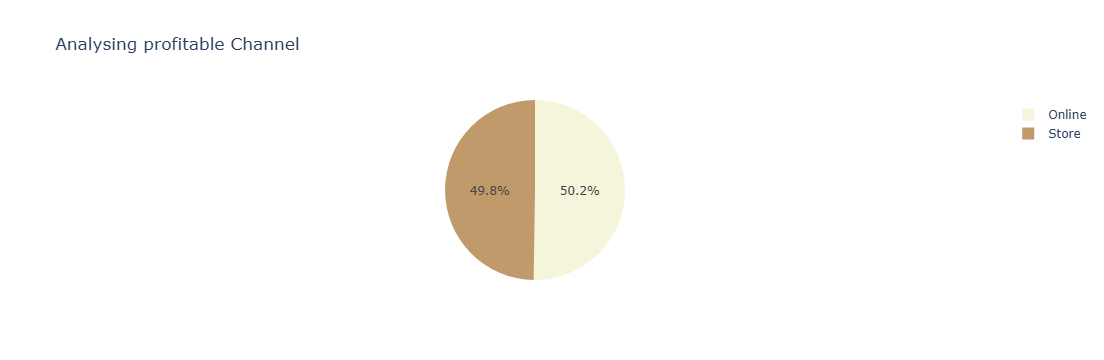

In [65]:
#ANALYSING PREFERRED CHANNEL
cgraph=px.pie(
    channel_sales,
    names="Channel",
    values="NetSales",
    title="Analysing profitable Channel",
    color_discrete_sequence=["#F5F5DC","#C19A6B"]
)
cgraph.show()


In [5]:
#MARGIN % IN EACH MODEL
data["MarginPercentage"]=(data["Profit"]/data["NetSales"])*100
profitable_model=data.groupby("Model")["MarginPercentage"].mean().sort_values(ascending=False)
profitable_model=profitable_model.reset_index()
print(profitable_model)

               Model  MarginPercentage
0  iPhone 15 Pro Max         14.222757
1      iPhone 15 Pro         13.769881
2          iPhone 15         13.729740
3      iPhone 14 Pro         13.681040
4          iPhone 14         13.246420
5          iPhone 13         13.155243


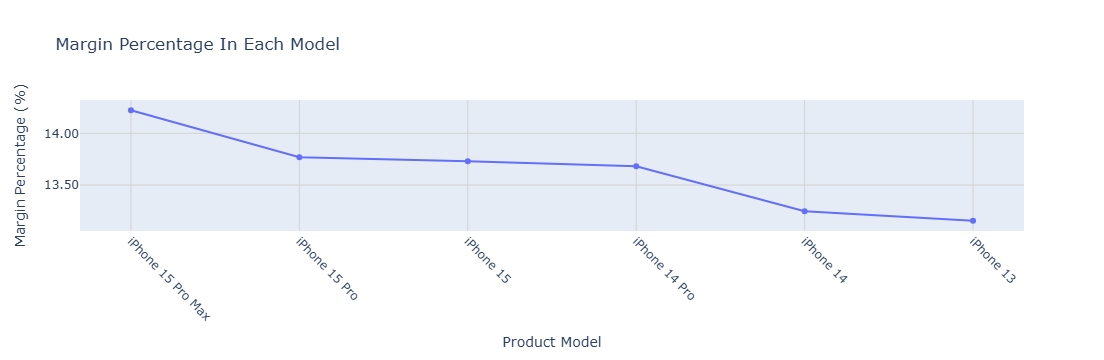

In [22]:
#MARGIN % IN EACH MODEL
mgraph=px.line(
    profitable_model, 
    x="Model", 
    y="MarginPercentage", 
    title="Margin Percentage In Each Model", 
    markers=True)
mgraph.update_layout(
    xaxis_title="Product Model",
    yaxis_title="Margin Percentage (%)",
    xaxis=dict(tickangle=45, showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey", tickformat=".2f")
)



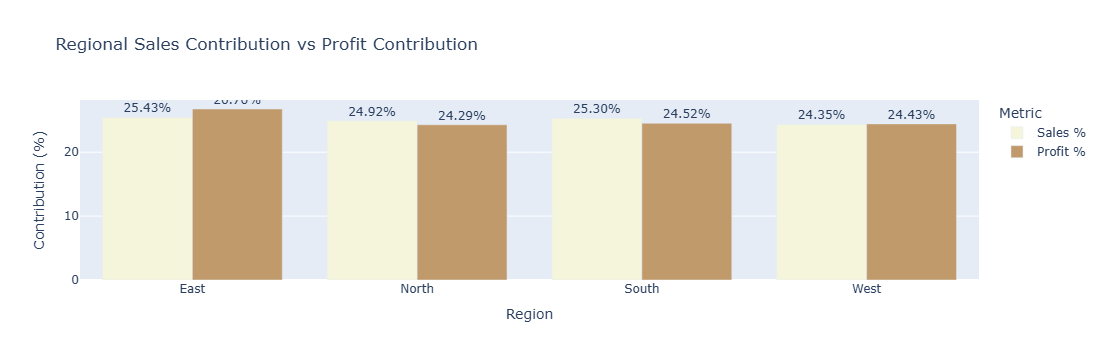

In [27]:
#REGIONAL SALES CONTRIBUTION vs PROFIT CONTRIBUTION
df_region = data.groupby('Region').agg({
    'NetSales': 'sum',
    'Profit': 'sum'
}).reset_index()

df_region['SalesContribution'] = (df_region['NetSales'] / df_region['NetSales'].sum()) * 100
df_region['ProfitContribution'] = (df_region['Profit'] / df_region['Profit'].sum()) * 100

df_melted = df_region.melt(
    id_vars='Region',
    value_vars=['SalesContribution', 'ProfitContribution'],
    var_name='Metric',
    value_name='Percentage'
)

df_melted['Metric'] = df_melted['Metric'].replace({
    'SalesContribution': 'Sales %',
    'ProfitContribution': 'Profit %'
})

fig = px.bar(
    df_melted,
    x='Region',
    y='Percentage',
    color='Metric',
    barmode='group',
    text='Percentage',
    title='Regional Sales Contribution vs Profit Contribution',
    color_discrete_sequence=["#F5F5DC","#C19A6B"]
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Contribution (%)',
    legend_title='Metric',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


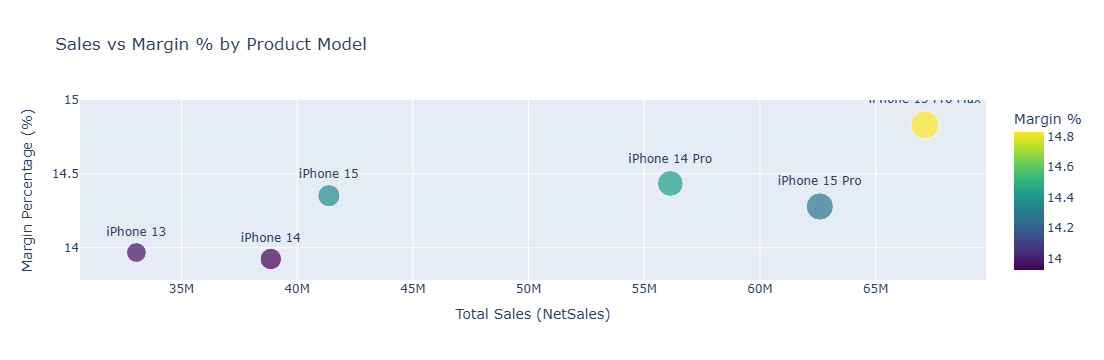

In [13]:
#SALES vs MARGIN % BY PRODUCT MODEL
df_model = data.groupby('Model').agg({
    'NetSales': 'sum',
    'Profit': 'sum'
}).reset_index()


df_model['MarginPercentage'] = (df_model['Profit'] / df_model['NetSales']) * 100


fig = px.scatter(
    df_model,
    x='NetSales',
    y='MarginPercentage',
    text='Model',            # show product names
    size='NetSales',         # bubble size based on sales
    color='MarginPercentage',# color based on margin %
    color_continuous_scale='Viridis',
    title='Sales vs Margin % by Product Model'
)

fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis_title='Total Sales (NetSales)',
    yaxis_title='Margin Percentage (%)',
    coloraxis_colorbar=dict(title='Margin %')
)

fig.show()


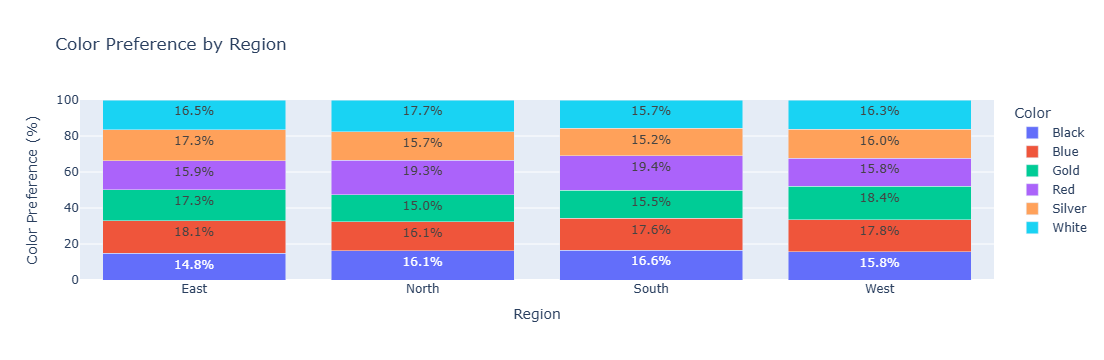

In [23]:
#COLOR PREFEREANCE BY REGION
df_color = data.groupby(['Region', 'Color']).size().reset_index(name='Count')


df_color['Percentage'] = df_color.groupby('Region')['Count'].transform(lambda x: (x / x.sum()) * 100)

fig = px.bar(
    df_color,
    x='Region',
    y='Percentage',
    color='Color',
    text=df_color['Percentage'].round(1).astype(str) + '%',
    title='Color Preference by Region',
    barmode='stack'
)

fig.update_traces(textposition='inside') hjh 
fig.update_layout(
    xaxis_title='Region',
    yaxis_title='Color Preference (%)',
    legend_title='Color',
    yaxis=dict(range=[0, 100])  
)

fig.show()
